#### Column information
- work_year; 급여가 지급된 년도
- experience_level: 직급 (EN: 신입, JM: 주니어-미드, SE: 시니어, EX: 임원진)
- employment_type: 업무 유형(PT: 파트타임, FT: 풀타임, CT: 계약직, FL: 프리랜서)
- job_title: 업무 이름
- salary: 급여
- salary_currency: 급여의 통화(EUR, USD, GBP etc)
- salary_in_usd: USD로 계산한 급여
- employee_residence: 거주 국가
- remote_ratio:원격 직무량(0: 20% 이하, 50: 부분적으로 있음, 100: full 원격)
- company_location: 회사 위치(=국가)
- company_size: 평균 직원 수

In [5]:
import pandas as pd
salary=pd.read_csv('ds_salaries.csv', index_col='Unnamed: 0')

In [6]:
salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [8]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [10]:
salary.keys()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [13]:
for feature in salary.keys():
    print(f"{feature}'s values are {salary[feature].unique()}'")
    print('-'*30)

work_year's values are [2020 2021 2022]'
------------------------------
experience_level's values are ['MI' 'SE' 'EN' 'EX']'
------------------------------
employment_type's values are ['FT' 'CT' 'PT' 'FL']'
------------------------------
job_title's values are ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software 

In [14]:
salary.shape

(607, 11)

In [16]:
salary[['salary', 'salary_in_usd']].mean()

salary           324000.062603
salary_in_usd    112297.869852
dtype: float64

In [17]:
salary[['salary', 'salary_in_usd']].describe()

,salary,salary_in_usd
count,6.070000e+02,607.000000
mean,3.240001e+05,112297.869852
std,1.544357e+06,70957.259411
min,4.000000e+03,2859.000000
25%,7.000000e+04,62726.000000
50%,1.150000e+05,101570.000000
75%,1.650000e+05,150000.000000
max,3.040000e+07,600000.000000


In [ ]:
# 비교를 위해 salary in usd를 사용해야겠다

In [18]:
salary.keys()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

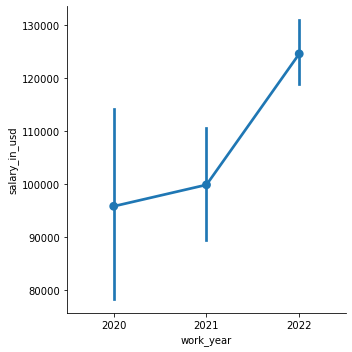

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='work_year', y='salary_in_usd', data=salary, kind='point')
plt.show()

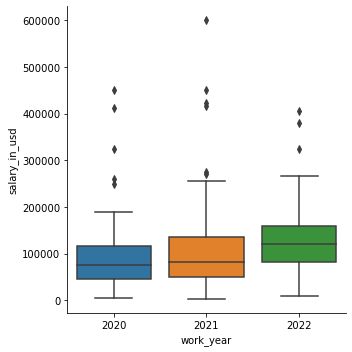

In [21]:
sns.catplot(x='work_year', y='salary_in_usd', data=salary, kind='box')
plt.show()

- 매년 평균 급여가 올라갔으나, 2022년에 많이 오름
- Q1은 2020년에 비해 2022년엔 미세하게, 2022년에는 크게 증가함
- upper whisker는 2020년에 비해 2021년에 눈의 띄게 높아졌으며, 2022년과는 크게 다르지 않음

In [35]:
ctg_features_year=['experience_level', 'employment_type', 'remote_ratio', 'company_size']

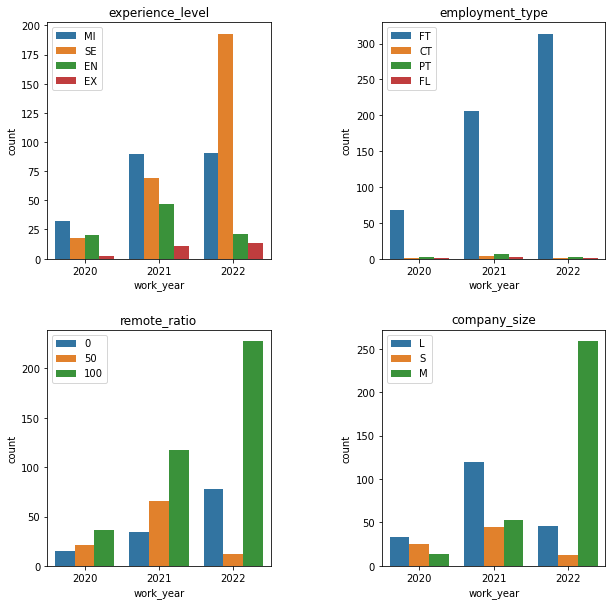

In [38]:
grid = gridspec.GridSpec(2,2) 
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.3) 

for idx, feature in enumerate(ctg_features_year):
    ax=plt.subplot(grid[idx])
    sns.countplot(x='work_year', hue=feature, data=salary, ax=ax)
    plt.legend()
    plt.title(f"{feature}")

In [48]:
salary['work_year'].value_counts(ascending=True)

2020     72
2021    217
2022    318
Name: work_year, dtype: int64

In [47]:
salary[salary['employment_type']=='FT'].groupby(['work_year']).agg({'employment_type': 'count'})

,employment_type
work_year,
2020,68
2021,206
2022,314


In [50]:
print(f"2020: {68/72}")
print(f"2021: {206/217}")
print(f"2020: {314/318}")

2020: 0.9444444444444444
2021: 0.9493087557603687
2020: 0.9874213836477987


#### experience_level
- senior가 2022년에 폭등함, 전체에서 차지하는 비중도 2-3위이다가 2022년에 가장 높은 비율 차지
- entry는 2021년에 잠시 오르고 2022년에 감소하여 2020년과 비슷함

#### employment_type
- 대부분 full-time
- 계산 결과 full-time 비율이 모두 약 0.95의 높은 비율이기 때문에 매년 full-time이 늘어난다고 보기는 어려울듯

#### remote_ratio
- 순위는 2020년과 2021년은 동일하나 2022년에는 부분적인 원격 업무 비중이 매우 줄어들음
- COVID19에 적응하면서 부분적 원격 업무를 중단하고 0 또는 100으로 가는듯
- 특히 100 원격 업무의 비중이 늘어남

#### company_size
- small size와 big size는 2021년에만 잠시 늘어나고 다시 원상복구
- medium size 회사가 2022년에 매우 많아짐

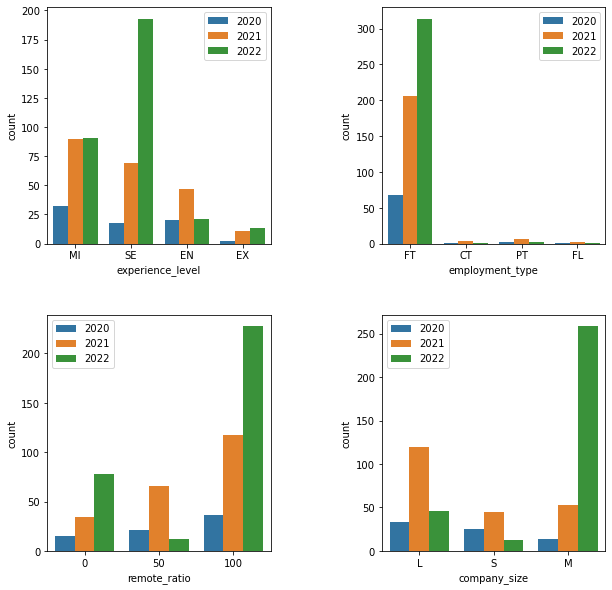

In [36]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2,2) 
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.3) 

for idx, feature in enumerate(ctg_features_year):
    ax=plt.subplot(grid[idx])
    sns.countplot(x=feature, hue='work_year', data=salary, ax=ax)
    plt.legend()

In [29]:
ctg_features=['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']
len(ctg_features)

5

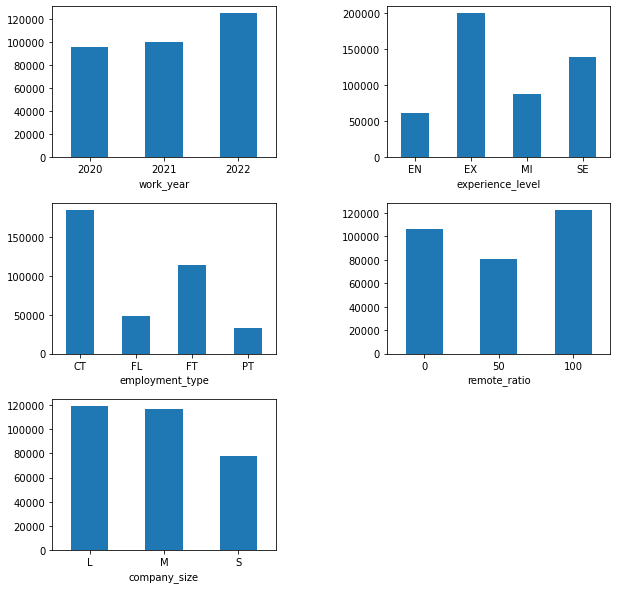

In [33]:
grid = gridspec.GridSpec(3,2) 
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.3) 

for idx, feature in enumerate(ctg_features):
    salary_a=salary.groupby(feature)['salary_in_usd'].mean()
    salary_a.plot(kind='bar', ax=plt.subplot(grid[idx]))
    plt.xticks(rotation=0)

In [ ]:
# 직무 이름 top 10 뽑아보기